In [15]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, Sequential

In [16]:
BATCH_SIZE = 30
IMAGE_SIZE = 100
data_dir = os.path.join('data/')
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE)
class_names = train_ds.class_names
print(class_names)

Found 1564 files belonging to 3 classes.
Using 1252 files for training.
Found 1564 files belonging to 3 classes.
Using 312 files for validation.
['onion', 'orange', 'unknown']


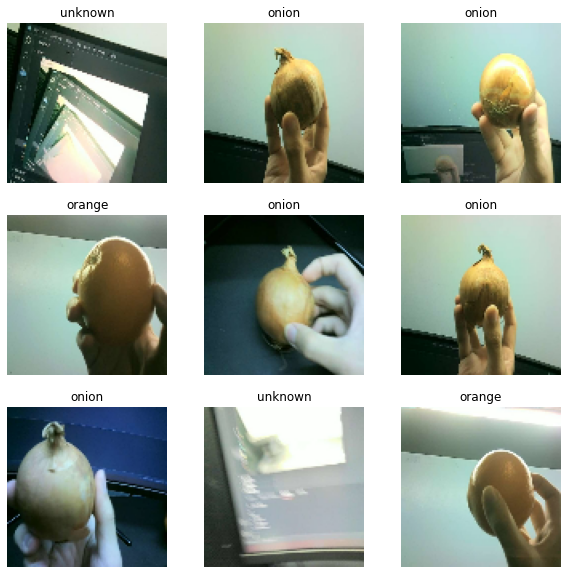

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

In [18]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [19]:
model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(3, activation = 'softmax'),
])
model.compile(
	optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ['accuracy'])

In [20]:
history = model.fit(
	train_ds,
	validation_data = val_ds,
	epochs = 10
)
model.summary()

Epoch 1/10
42/42 [==============================] - 1s 20ms/step - loss: 114.0412 - accuracy: 0.6190 - val_loss: 0.9165 - val_accuracy: 0.5897
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.2486 - accuracy: 0.9201 - val_loss: 0.4228 - val_accuracy: 0.8846
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.1289 - accuracy: 0.9505 - val_loss: 0.3099 - val_accuracy: 0.8942
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0626 - accuracy: 0.9816 - val_loss: 0.1395 - val_accuracy: 0.9615
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0566 - accuracy: 0.9808 - val_loss: 0.2092 - val_accuracy: 0.9359
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0342 - accuracy: 0.9872 - val_loss: 0.0986 - val_accuracy: 0.9744
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0183 - accuracy: 0.9952 - val_loss: 0.0935 - val_accuracy: 0.9679
Epoch 8/10


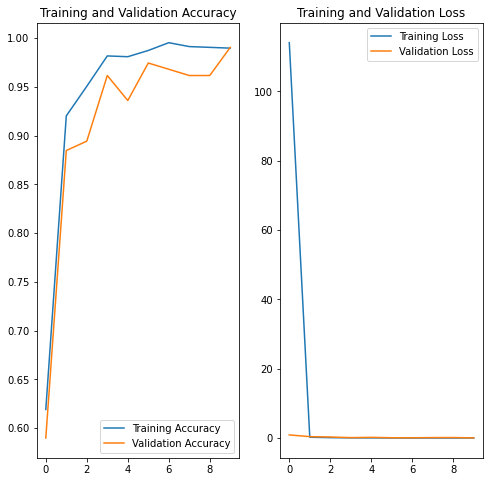

Testing model:
11/11 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9904


In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("Testing model:")
model.evaluate(val_ds)

# saving model as .hdf5
tf.keras.models.save_model(model, 'model.hdf5')